In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/urls.csv")
data = data.drop(["Domain"],axis = 1)
data.head()

,Unnamed: 0,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1
1,1,0,0,1,3,0,0,0,0,0,1,1,1,1,1,1,0
2,2,0,0,0,0,0,0,0,1,0,1,1,1,1,1,1,1
3,3,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1
4,4,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data.drop(data.columns[data.columns.str.contains('Unnamed',case = False)],axis = 1, inplace = True)
data.head()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1
1,0,0,1,3,0,0,0,0,0,1,1,1,1,1,1,0
2,0,0,0,0,0,0,0,1,0,1,1,1,1,1,1,1
3,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1
4,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1


In [4]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [5]:
data.columns

Index(['Have_IP', 'Have_At', 'URL_Length', 'URL_Depth', 'Redirection',
       'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record', 'Domain_Age',
       'Domain_End', 'iFrame', 'Mouse_Over', 'Right_Click', 'Web_Forwards',
       'Label'],
      dtype='object')

In [6]:
y = data.Label
X_cols = ['Have_IP', 'Have_At', 'URL_Length', 'URL_Depth', 'Redirection',
       'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record', 'Domain_Age',
       'Domain_End', 'iFrame', 'Mouse_Over', 'Right_Click', 'Web_Forwards',]
X = data[X_cols]
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3, random_state = 0)

In [7]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [8]:
y_pred = nb.predict(X_test)

In [9]:
print("Naive Bayes score: ",nb.score(X_test, y_test))

Naive Bayes score:  0.9183333333333333


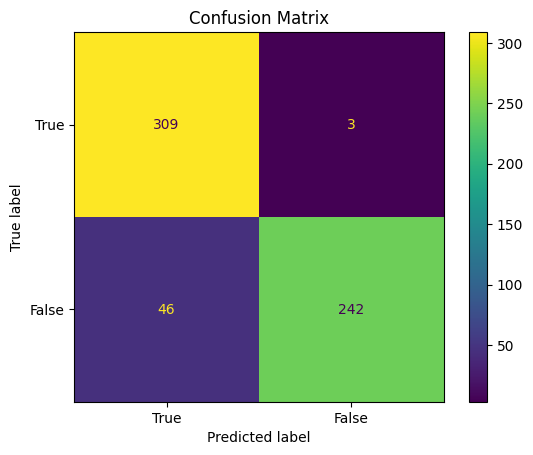

In [10]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cnf_matrix = confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(confusion_matrix  = cnf_matrix,display_labels = [True, False]).plot()
plt.title('Confusion Matrix')
plt.show()